<a href="https://colab.research.google.com/github/balajiabcd/Euro-USD-Stock-Price-Prediction/blob/main/euro_and_usd_stock_prediction07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import os

# go up one level
os.chdir("..")

print(os.getcwd())


d:\Github_work\Euro-USD-Stock-Price-Prediction


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv("data/Entire.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,2020-12-02 09:53,1.20584,1.20586,1.20577,1.20583,263
1,2020-12-02 09:54,1.20583,1.20586,1.20577,1.20577,230
2,2020-12-02 09:55,1.20575,1.20589,1.20569,1.20586,268
3,2020-12-02 10:00,1.20536,1.20564,1.20530,1.20552,298
4,2020-12-02 10:01,1.20551,1.20563,1.20525,1.20542,481


# Data Analysis

In [4]:
data["Date"] =  [datetime.strptime(a, '%Y-%m-%d %H:%M') for a in data.Date]
data = data.sort_values(by = "Date").reset_index()
data = data.drop("index", axis = 1)
data["date"] =  [a.date() for a in data.Date]

In [5]:
data.head()

,Date,Open,High,Low,Close,Volume,date
0,2007-01-01 00:00:00,1.31908,1.31973,1.31872,1.31952,145690,2007-01-01
1,2007-01-01 00:00:00,1.31908,1.32095,1.31650,1.32058,1946843,2007-01-01
2,2007-01-01 01:00:00,1.31908,1.31964,1.31896,1.31913,24827,2007-01-01
3,2007-01-01 01:00:00,1.31908,1.31964,1.31894,1.31915,47067,2007-01-01
4,2007-01-01 01:30:00,1.31920,1.31943,1.31894,1.31915,22240,2007-01-01


In [6]:
data.date[len(data)-1]

datetime.date(2021, 1, 22)

In [7]:
data.tail()

,Date,Open,High,Low,Close,Volume,date
940398,2021-01-22 22:55:00,1.21701,1.21717,1.21666,1.21667,2352,2021-01-22
940399,2021-01-22 22:56:00,1.21709,1.21712,1.21706,1.21709,564,2021-01-22
940400,2021-01-22 22:57:00,1.21709,1.21710,1.21702,1.21706,690,2021-01-22
940401,2021-01-22 22:58:00,1.21705,1.21709,1.21704,1.21706,473,2021-01-22
940402,2021-01-22 22:59:00,1.21705,1.21717,1.21666,1.21667,249,2021-01-22


In [8]:
date, volume, high, low, ave  = [],[],[],[],[] 
d, h, l, vol = data.date[0], 0, 0, 0
for i in range(len(data)+1):

    if i == len(data) or d != data.date[i]:
        date.append(d)
        volume.append(vol)
        high.append(h)
        low.append(l)
        ave.append((h+l)/2)
        if i != len(data):
            d = data.date[i]
            h, l, vol = data.High[i], data.Low[i], data.Volume[i]
    else:
        vol += data.Volume[i]
        if h < data.High[i]:
            h = data.High[i]
        if l < data.Low[i]:
            l = data.Low[i]


    

In [9]:
new_data = pd.DataFrame({ 
    'date' : date,
    'volume' : volume,
    'high' : high,
    'low': low,
    'ave' : ave })
print(len(new_data))
new_data.head()

4398


,date,volume,high,low,ave
0,2007-01-01,7787372,1.32095,1.31959,1.32027
1,2007-01-02,8039464,1.32951,1.32795,1.32873
2,2007-01-03,8068956,1.32903,1.32809,1.32856
3,2007-01-04,8026940,1.31783,1.31699,1.31741
4,2007-01-05,7861656,1.31029,1.30929,1.30979


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='high'>

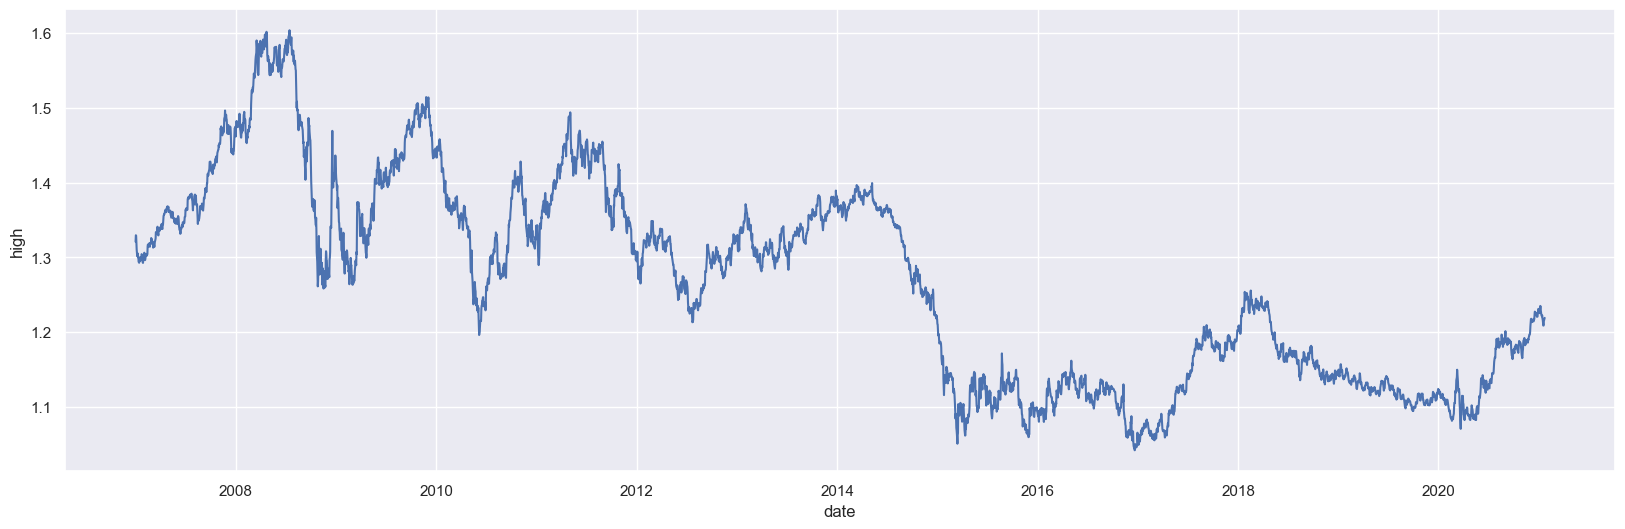

In [10]:
plt.figure(figsize = (20,6))
sns.lineplot(data=new_data, x="date", y="high")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='low'>

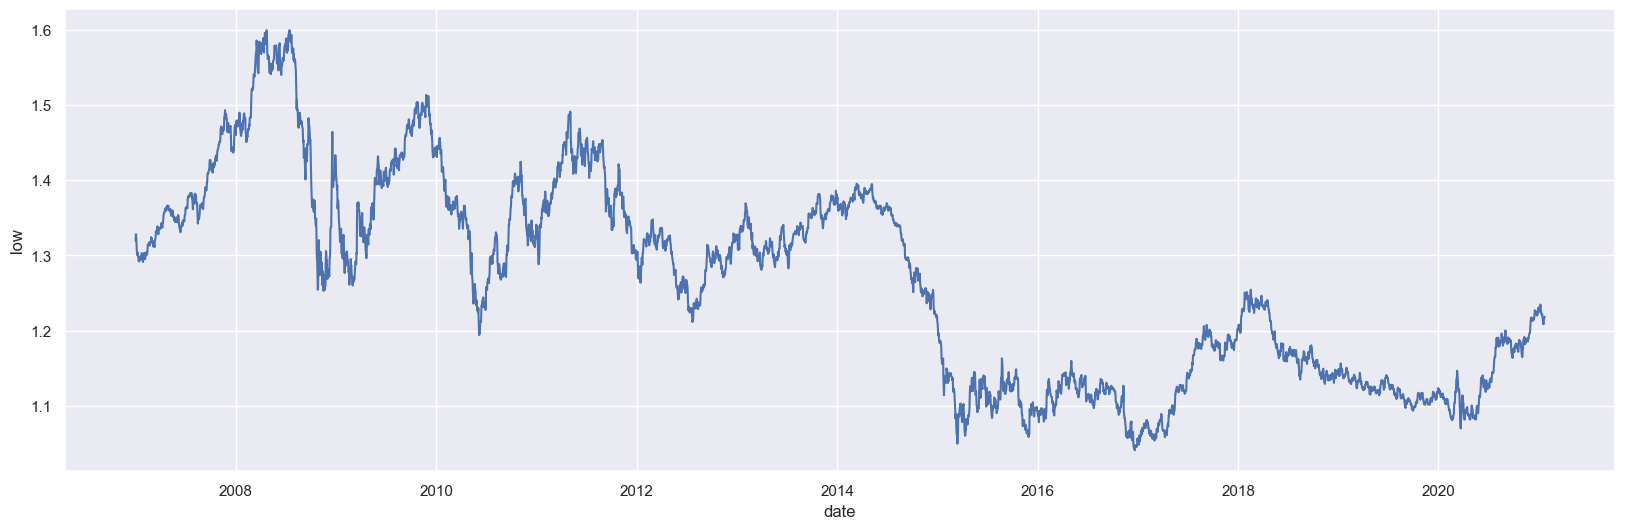

In [11]:
plt.figure(figsize = (20,6))
sns.lineplot(data=new_data, x="date", y="low")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='ave'>

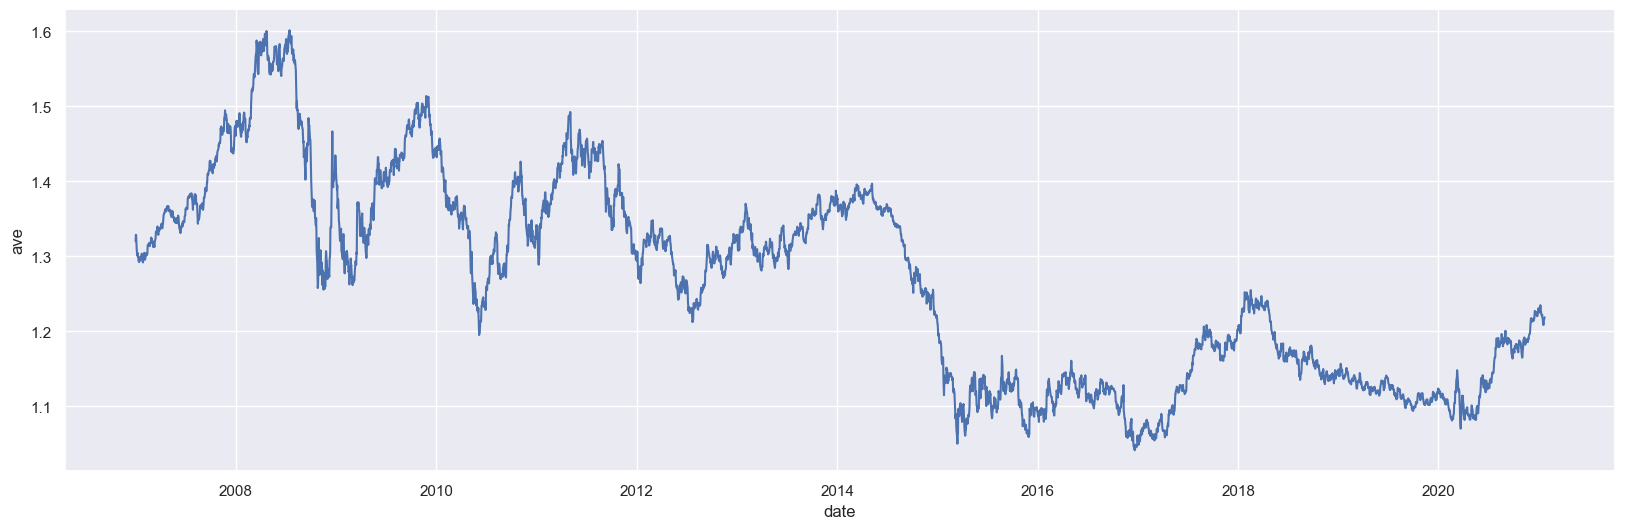

In [12]:
plt.figure(figsize = (20,6))
sns.lineplot(data=new_data, x="date", y="ave")

# Training and test set Preparation

In [13]:
ave = [a*100 for a in ave]

In [14]:
a = 120

In [15]:
X_data, y_data = [], []
for i in range(a,len(ave)):
    X_data.append( ave[i-a:i] )
    y_data.append( ave[i] )

len(X_data)

4278

In [16]:
X_train, X_val, X_test = X_data[:3000], X_data[3000:3350], X_data[3350:]
y_train, y_val, y_test = y_data[:3000], y_data[3000:3350], y_data[3350:]

In [17]:
def arraying(s):
    return np.array(s)

def shapeshift(s):
    s = arraying(s)
    return np.reshape(s, (s.shape[0], s.shape[1], 1))

X_train, X_val, X_test = shapeshift(X_train), shapeshift(X_val), shapeshift(X_test)
y_train, y_val, y_test = arraying(y_train), arraying(y_val), arraying(y_test)

In [18]:
X_train.shape

(3000, 120, 1)

# Building RNN model (LSTM)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import layers

In [20]:
model = Sequential([layers.Input((a,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = "relu"),
                    layers.Dense(32, activation = "relu"),
                    layers.Dense(1)
                   ])

model.compile(loss="mse", optimizer = "Adam", metrics = ["mean_absolute_error"])

In [21]:
model.fit(X_train,y_train, validation_data = (X_val, y_val), epochs = 30)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 17115.4121 - mean_absolute_error: 130.1764 - val_loss: 7678.9229 - val_mean_absolute_error: 87.4399
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 6449.6104 - mean_absolute_error: 73.0518 - val_loss: 447.2152 - val_mean_absolute_error: 20.3673
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 161.5942 - mean_absolute_error: 9.9061 - val_loss: 274.2482 - val_mean_absolute_error: 15.8628
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 99.9855 - mean_absolute_error: 7.8466 - val_loss: 24.4991 - val_mean_absolute_error: 4.7881
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 11.9105 - mean_absolute_error: 2.2419 - val_loss: 1.2081 - val_mean_absolute_error: 0.9563
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 3.0326 - mean_absolute_error: 1.1097 - val_loss: 0.9022 - val_mean_absolute_error: 0.8153
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 1.9161 - mean_absolute

# Train Set Results

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


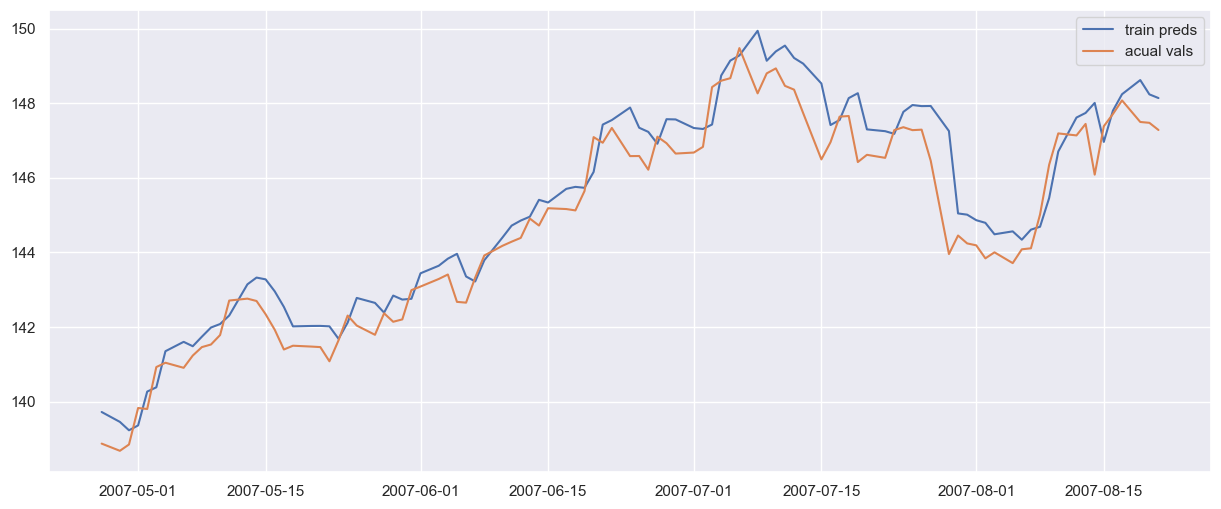

In [22]:
y_train_pred = model.predict(X_train)

a, b = 200, 100

plt.figure(figsize = (15,6))
plt.plot(date[b:a], y_train_pred[b:a])
plt.plot(date[b:a], y_train[b:a])
plt.legend(["train preds", "acual vals"])

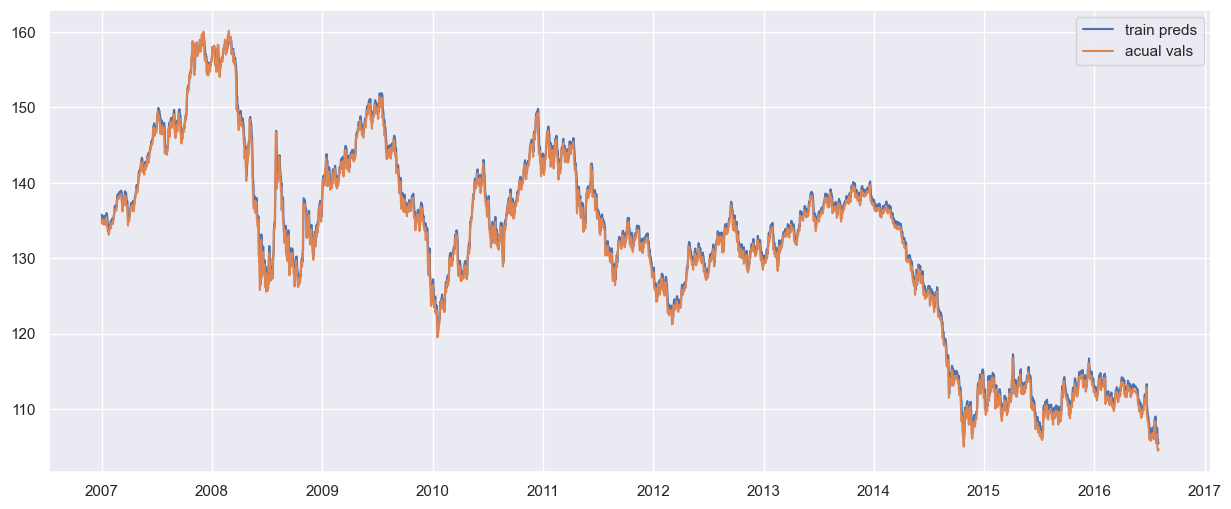

In [23]:
plt.figure(figsize = (15,6))
plt.plot(date[:3000], y_train_pred)
plt.plot(date[:3000], y_train)
plt.legend(["train preds", "acual vals"])

In [24]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_train,y_train_pred)/100

0.007645559897054036

# Test set predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


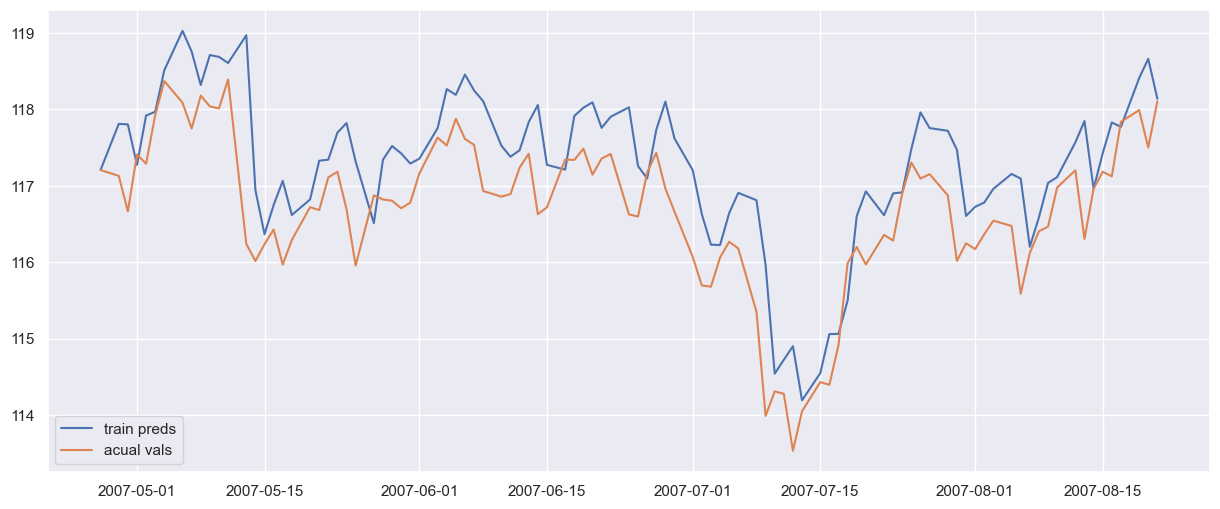

In [25]:
y_pred = model.predict(X_test)

a, b = 200, 100

plt.figure(figsize = (15,6))
plt.plot(date[b:a], y_pred[b:a])
plt.plot(date[b:a], y_test[b:a])
plt.legend(["train preds", "acual vals"])

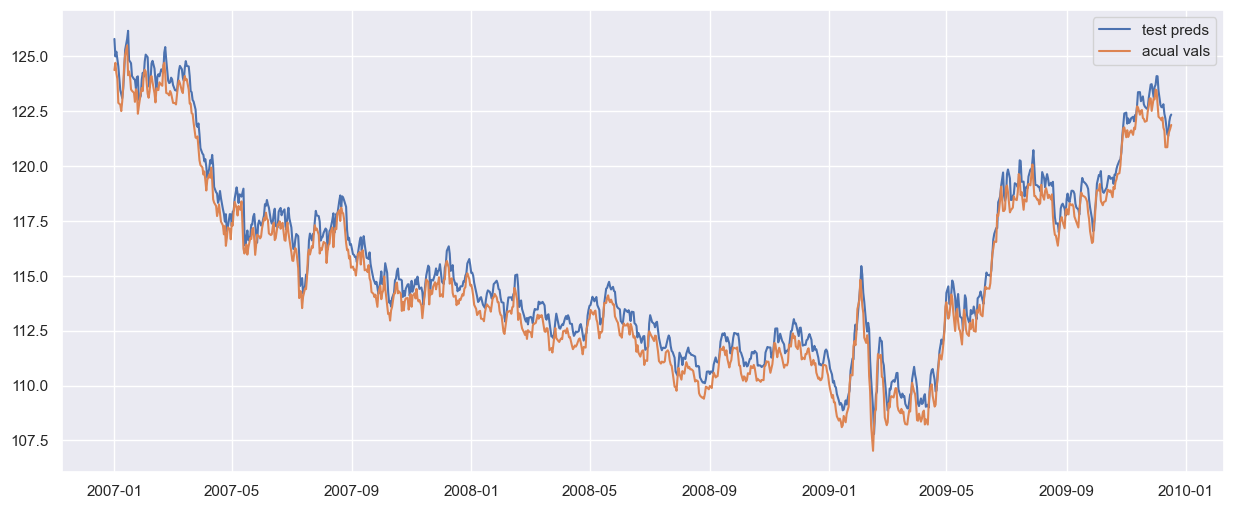

In [26]:
plt.figure(figsize = (15,6))
plt.plot(date[:928], y_pred)
plt.plot(date[:928], y_test)
plt.legend(["test preds", "acual vals"])

In [27]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)/100

0.0065268622062946155